In [1]:
!pip install tensorflow==2.16.1
!pip install segmentation-models
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models
!PYTHONHASHSEED=0
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from time import time
import numpy as np
import random as python_random
from tensorflow.keras.models import load_model
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 4.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found e

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install --upgrade keras-cv tensorflow
import keras_cv

In [4]:
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/models/model_aug.keras'
weights_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/models/model_aug.weights.h5'



model = load_model(model_path, compile=False)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=segmentation_models.losses.DiceLoss(), metrics=[segmentation_models.metrics.FScore(), segmentation_models.metrics.IOUScore()])
model.load_weights(weights_path)

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 150 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_rotation           │ (None, 128, 128, 4)    │              0 │ input_layer[0][0]      │
│ (RandomRotation)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │          1,184 │ random_rotation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 7,858,820 (29.98 MB)

 Trainable params: 7,852,932 (29.96 MB)

 Non-trainable params: 5,888 (23.00 KB)

In [ ]:
backbone = keras_cv.models.ResNet50V2Backbone(input_shape=[128, 128, 4])
model = keras_cv.models.segmentation.DeepLabV3Plus(
    num_classes=4, backbone=backbone,
)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=segmentation_models.losses.DiceLoss(), metrics=[segmentation_models.metrics.FScore(), segmentation_models.metrics.IOUScore()])
model.load_weights(weights_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 392 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [5]:
test_imgs_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/test_imgs_2D.npy'
test_mask_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/test_labels_2D.npy'

X_test = np.load(test_imgs_path)
Y_test = np.load(test_mask_path)

In [ ]:
X_test.shape

(3840, 4, 128, 128)

In [ ]:
Y_test.shape

(3840, 4, 128, 128)

In [6]:
X_test = np.moveaxis(X_test, [1,3], [3,1])
Y_test = np.moveaxis(Y_test, [1,3], [3,1])

In [7]:
patients = []
patients_label = []
for i in range(0,10):
  start = 384*i
  end = 384+start
  patients.append(X_test[start:end])
  patients_label.append(Y_test[start:end])

patients=np.array(patients)
patients_label=np.array(patients_label)

patients.shape[0]

10

In [ ]:
patients[0].shape

(384, 128, 128, 4)

In [8]:
evals = []
for i in range(0, patients.shape[0]):
  eval = model.evaluate(patients[i], patients_label[i])
  evals.append(eval)

12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - f1-score: 0.4159 - iou_score: 0.3581 - loss: 0.5841
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - f1-score: 0.4747 - iou_score: 0.4038 - loss: 0.5253
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - f1-score: 0.5855 - iou_score: 0.5081 - loss: 0.4145
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - f1-score: 0.5866 - iou_score: 0.5080 - loss: 0.4134
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - f1-score: 0.5413 - iou_score: 0.4600 - loss: 0.4587
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - f1-score: 0.3162 - iou_score: 0.2875 - loss: 0.6838
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - f1-score: 0.5356 - iou_score: 0.4686 - loss: 0.4644
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - f1-score: 0.3308 - iou_score: 0.2922 - loss: 0.6692
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - f1-score: 0.3307 - iou_score: 0.2992 - loss: 0.6693
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - f1-score: 0.4309 - iou_score: 0.3747 - loss: 0.5691


In [9]:
evals = np.array(evals)
means = np.mean(evals, axis=0)
means

array([0.55419524, 0.44580475, 0.38791502])

In [10]:
import pandas as pd

row = {'Loss': means[0], 'F1 Score':means[1], 'IoU score': means[2]}

test_metrics = pd.DataFrame(row, index=['test set'])
test_metrics

,Loss,F1 Score,IoU score
test set,0.554195,0.445805,0.387915


In [11]:
rows_list = []
for i in range(0, evals.shape[0]):
  row = {'Loss': evals[i][0], 'F1 Score':evals[i][1], 'IoU score': evals[i][2]}
  rows_list.append(row)

patients_metrics = pd.DataFrame(rows_list)
patients_metrics

,Loss,F1 Score,IoU score
0,0.554050,0.445950,0.381642
1,0.561115,0.438885,0.378310
2,0.463137,0.536863,0.466885
3,0.450529,0.549471,0.477917
4,0.501279,0.498721,0.431211
5,0.661704,0.338296,0.301060
6,0.489469,0.510531,0.443463
7,0.640189,0.359811,0.311986
8,0.683416,0.316584,0.291214
9,0.537065,0.462935,0.395460


In [12]:
test_metrics.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/results/deeplabv3/Linknet_test_metrics.csv')
patients_metrics.to_csv('/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/results/deeplabv3/Linknet_patient_metrics.csv')

In [ ]:
prediction = []
for i in range(0, patients.shape[0]):
  pred = model.predict(patients[i])
  prediction.append(pred)



12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


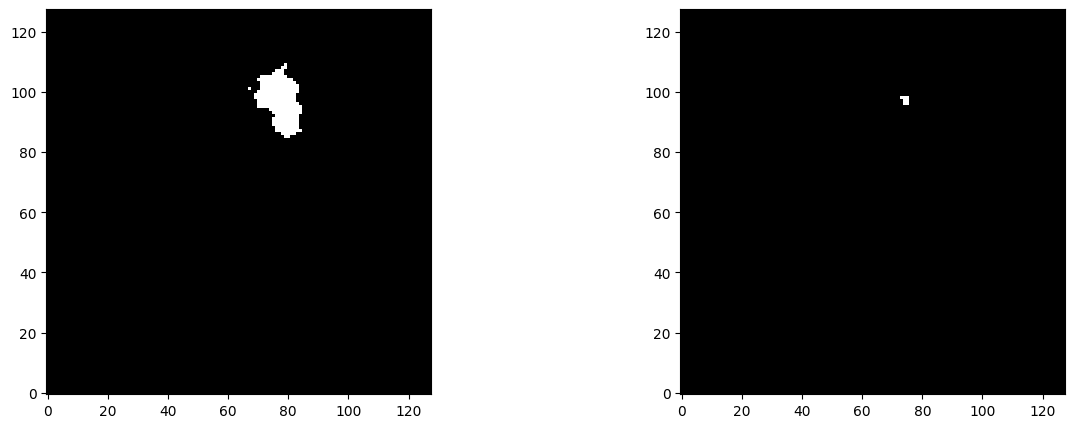

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tf.transpose(tf.math.argmax(patients_label[7][48], axis=-1)), origin='lower', cmap='gray')
ax[1].imshow(tf.transpose(tf.math.argmax(prediction[7][48], axis=-1)), origin='lower', cmap='gray')


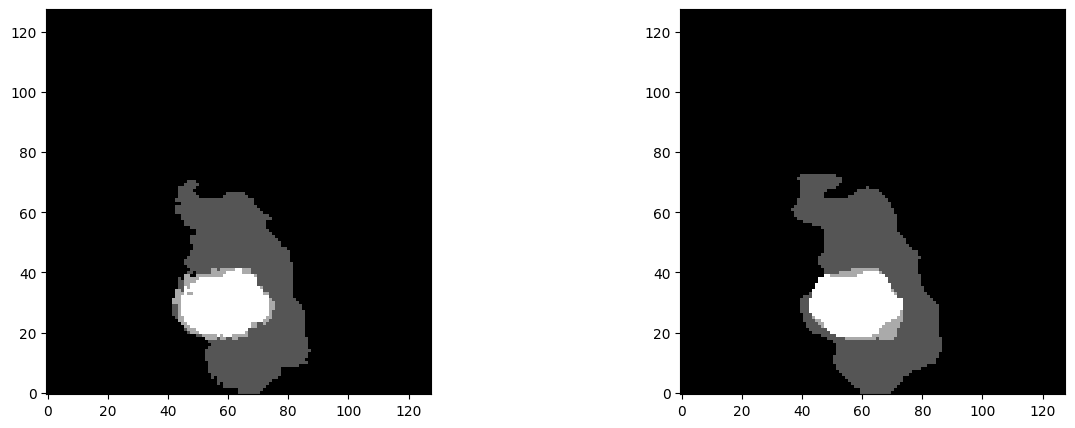

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tf.transpose(tf.math.argmax(patients_label[2][48], axis=-1)), origin='lower', cmap='gray')
ax[1].imshow(tf.transpose(tf.math.argmax(prediction[2][48], axis=-1)), origin='lower', cmap='gray')

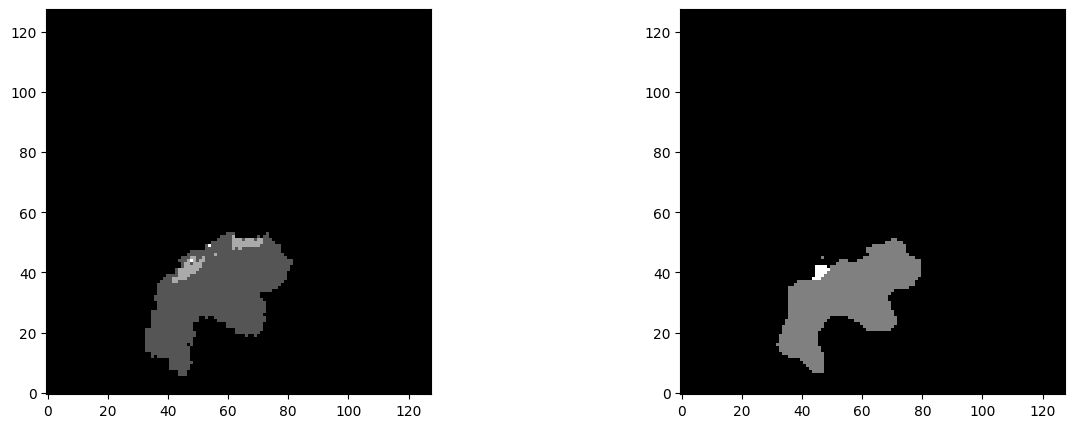

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tf.transpose(tf.math.argmax(patients_label[3][150], axis=-1)), origin='lower', cmap='gray')
ax[1].imshow(tf.transpose(tf.math.argmax(prediction[3][150], axis=-1)), origin='lower', cmap='gray')

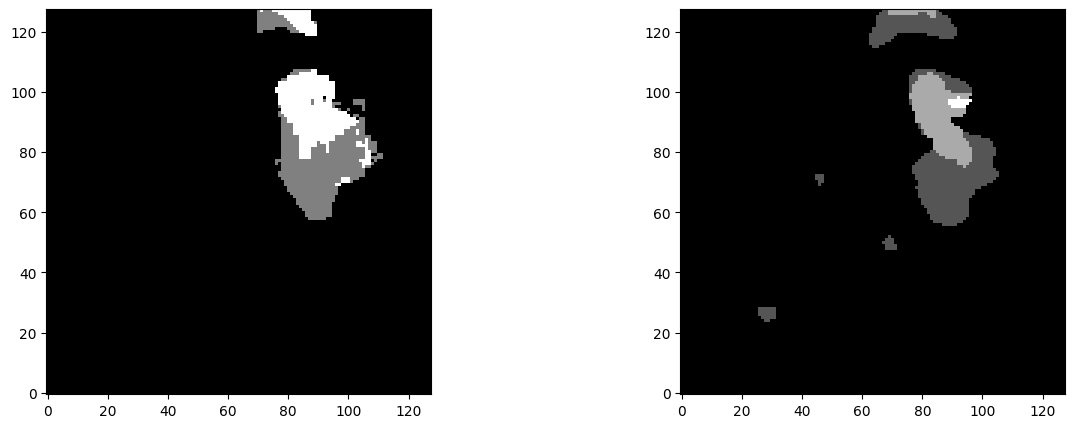

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tf.transpose(tf.math.argmax(patients_label[5][90], axis=-1)), origin='lower', cmap='gray')
ax[1].imshow(tf.transpose(tf.math.argmax(prediction[5][90], axis=-1)), origin='lower', cmap='gray')

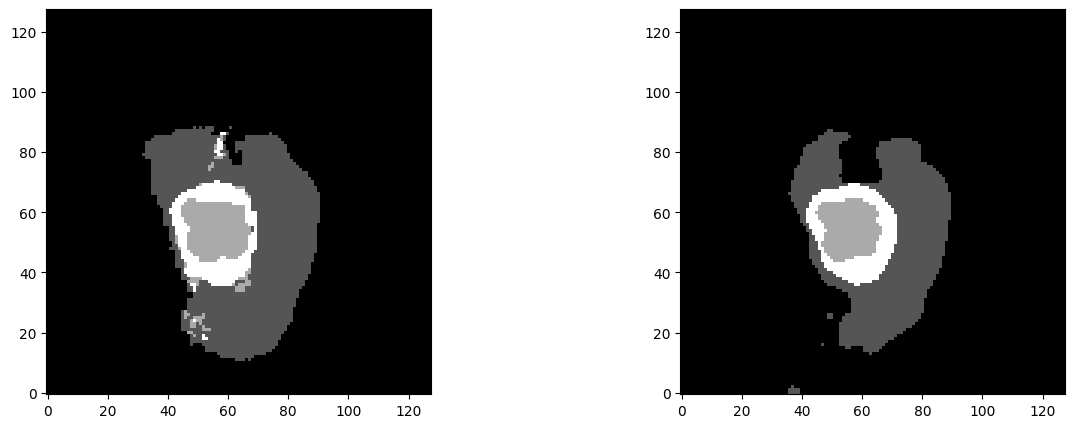

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
ax[0].imshow(tf.transpose(tf.math.argmax(patients_label[3][45], axis=-1)), origin='lower', cmap='gray')
ax[1].imshow(tf.transpose(tf.math.argmax(prediction[3][45], axis=-1)), origin='lower', cmap='gray')